In [1]:
import hdnet
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
Js = spio.loadmat('data/exp2/Jexp2.mat')
Js = Js['Js']
thetas = spio.loadmat('data/exp2/Theta_exp2.mat')
thetas = thetas['Thetas']

In [3]:
NEURONS = 15
NUM_SAMPLES = 3*10**4
BURN_IN = 5*10**3

In [6]:
samples = hdnet.sampling.sample_from_ising_metropolis(J=0.5*Js[0,:NEURONS,:NEURONS], 
theta=-thetas[0,:NEURONS], k=0.01, burn_in=BURN_IN,num_samples=NUM_SAMPLES)
print(np.shape(samples))
print(type(samples))

(15, 30000)
<class 'numpy.ndarray'>


In [8]:
metro = hdnet.spikes.Spikes(samples)
print(metro)
print(metro.get_frequencies())

<Spikes: 15 neurons, 30000 bins, 1 trials>
Counter({'000000000000000': 14035, '000000000000010': 3768, '000010000000000': 3728, '100000000000000': 1452, '000000010000000': 1078, '000010000000010': 1046, '010000000000000': 633, '000000000001000': 342, '100010000000000': 336, '000000000001010': 292, '010000000000010': 276, '000000100000000': 264, '100000000000010': 234, '000000010000010': 200, '100000000001000': 168, '000001000000000': 140, '001000000000000': 118, '100010000000010': 108, '010010010000000': 108, '010010000000000': 107, '010000000001010': 107, '010010000000010': 105, '000010010000000': 99, '000010000001000': 91, '001000000000010': 90, '010000010000000': 83, '000001010000000': 79, '001010000000010': 79, '100000000001010': 76, '000010010000010': 68, '000000110001000': 68, '000011000000000': 60, '000000010000100': 56, '000010000001010': 52, '111000000001000': 43, '000000010001010': 41, '101010000000010': 40, '010000010001000': 35, '110000000000000': 33, '000010010000100': 32,

/usr/local/lib/python3.6/dist-packages/hdnet-0.1-py3.6.egg/hdnet/spikes.py:472: RuntimeWarning: invalid value encountered in true_divide
  single_centered_scaled_spikes = (self._spikes[i].T - mu)/sd


(1, 15, 15)


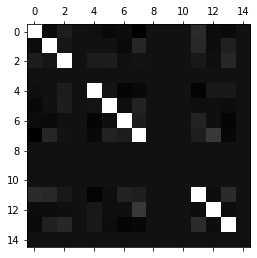

In [9]:
m_second_order = metro.NOrderInteractions(N=2)
print(np.shape(m_second_order))
plt.matshow(m_second_order[0],cmap='gray')
plt.show()

In [4]:
def runMonteCarlo(J,theta,k=0.01, burn_in=500, tot_time=10000):
	n = len(theta)
	samples=[]
	xold = np.asarray([int(i) for i in np.binary_repr(np.random.randint(0,np.power(2,n)),n)])
	Eold = -np.inner(theta,xold)+np.inner(xold,np.dot(J,xold))
	pm = np.exp(-k*np.arange(1,n)); pm /= np.sum(pm)
	mean = np.zeros(n)
	corr = np.zeros([n,n])
	for t in tqdm(range(burn_in+tot_time)):
		m = np.random.choice(n-1,size=1,p=pm)+1
		foo = np.random.choice(n,size=m,replace=False)
		xnew = np.zeros(n)
		for i in range(n):
			if i in foo:
				xnew[i] = 1-xold[i]
			else:
				xnew[i] = xold[i]
		Enew = np.inner(-theta,xnew)+np.inner(xnew,np.dot(J,xnew))
		dE = Enew-Eold
		acceptance_ratio = np.exp(-dE)
		u = np.random.uniform()
		if u<acceptance_ratio:
			Eold = Enew
			if t>burn_in-1:
				mean += xnew
				corr += np.outer(xnew,xnew)
				samples.append(xnew)
			xold = xnew
		else:
			if t>burn_in-1:
				mean += xold
				corr += np.outer(xold,xold)
				samples.append(xold)
	mean /= tot_time
	corr /= tot_time
	return mean, corr,samples

In [19]:
samples = runMonteCarlo(J=0.5*Js[0,:NEURONS,:NEURONS], 
theta=-thetas[0,:NEURONS], k=0.01, burn_in=BURN_IN, 
tot_time=NUM_SAMPLES)
print(np.shape(samples))
print(type(samples))

100%|██████████| 35000/35000 [00:05<00:00, 6874.37it/s]

(15, 30000)
<class 'numpy.ndarray'>


100%|██████████| 35000/35000 [00:05<00:00, 6111.63it/s]


<Spikes: 15 neurons, 30000 bins, 1 trials>


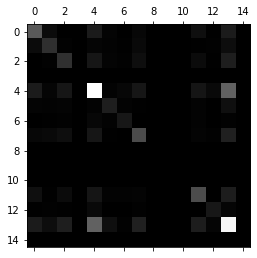

In [5]:
mean, corr,samples = runMonteCarlo(J=0.5*Js[0,:NEURONS,:NEURONS], 
theta=-thetas[0,:NEURONS], k=0.01, burn_in=BURN_IN, 
tot_time=NUM_SAMPLES)
metro1 = hdnet.spikes.Spikes(np.transpose(np.asarray(samples)))
print(metro1)
plt.matshow(corr,cmap='gray')
plt.show()

In [6]:
print(metro1.get_frequencies())

Counter({'000000000000000': 13301, '000010000000000': 3279, '000000000000010': 2404, '000010000000010': 1589, '100000000000000': 701, '000000000001000': 695, '010000000000000': 540, '000000010000000': 485, '100010000000010': 391, '000000010000010': 359, '000010010000000': 325, '100000000000010': 313, '100010000000000': 292, '001000000000000': 255, '001010000000010': 248, '000000100000000': 234, '100000000001000': 227, '000000000001010': 219, '000010000000100': 215, '000001000000010': 207, '000000000000100': 200, '000010000001000': 189, '010000000000010': 181, '000010010000010': 179, '001010000001010': 159, '001000010000000': 159, '001000000001010': 140, '000010000001010': 124, '110000000000000': 122, '100010000001000': 121, '001000010000010': 117, '000001000000000': 116, '100001000000000': 113, '110000010000000': 106, '000010100000000': 101, '100000010000000': 87, '000001100000000': 86, '000001000001010': 83, '000000100001000': 79, '001011000000010': 78, '000000000000110': 76, '0110000

(1, 15, 15)


/usr/local/lib/python3.6/dist-packages/hdnet-0.1-py3.6.egg/hdnet/spikes.py:472: RuntimeWarning: invalid value encountered in true_divide
  single_centered_scaled_spikes = (self._spikes[i].T - mu)/sd


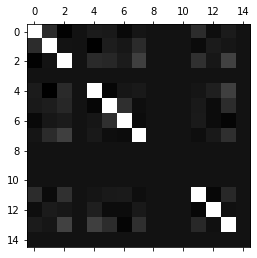

In [7]:
m_second_order = metro1.NOrderInteractions(N=2)
print(np.shape(m_second_order))
plt.matshow(m_second_order[0],cmap='gray')
plt.show()

In [10]:
true_spikes = hdnet.spikes.Spikes(spikes=hdnet.sampling.sample_from_ising_gibbs(J=0.5*Js[0,:NEURONS,:NEURONS], 
theta=-thetas[0,:NEURONS], num_samples = NUM_SAMPLES, burn_in = 5*10**2, sampling_steps = 10**2))
t_samples=true_spikes._spikes
print(true_spikes)

<Spikes: 15 neurons, 30000 bins, 1 trials>


(1, 15, 15)


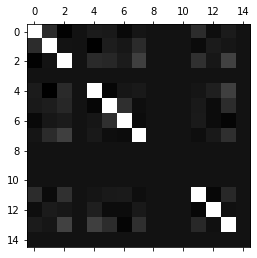

In [11]:
true_spikes_second_order = true_spikes.NOrderInteractions(N=2)
print(np.shape(m_second_order))
plt.matshow(m_second_order[0],cmap='gray')
plt.show()

In [13]:
def explicit(J,theta): # can be used if number of neurons is less than 21
	n = len(theta)
	#J = J[:n,:n]
	#theta = theta[:n]
	#
	corr_model = np.zeros([n,n])
	mean_model = np.zeros(n)
	Z = 0
	for i in tqdm(range(np.power(2,n))):
		x = np.asarray([int(j) for j in np.binary_repr(i,width=n)])
		E = np.inner(theta,x)+np.inner(x,np.dot(J,x))
		corr_model += np.outer(x,x)*np.exp(-E)
		mean_model += x*np.exp(-E)
		Z += np.exp(-E)
	corr_model /= Z
	mean_model /= Z
	return mean_model, corr_model

100%|██████████| 32768/32768 [00:01<00:00, 25596.26it/s]


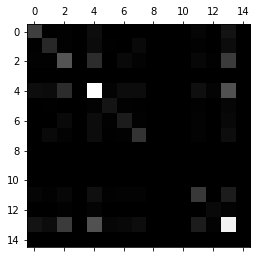

In [16]:
m1,c1=explicit(J=Js[0,:NEURONS,:NEURONS], theta=thetas[0,:NEURONS])
plt.matshow(c1,cmap='gray')